In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
# Load data
df = pd.read_csv("weather_dataset_with_risk.csv")  # or the path to your file

In [13]:
# Step 1: Feature selection and encoding
X = df[["temperature", "precipitation", "wind_speed", "delay_hours", "risk_score"]]
y = df["risk_level"]

# Encode risk_level (low, medium, high) to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # low=1, medium=2, high=0 (or similar)

In [14]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [15]:
# Step 3: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Step 4: Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
# Step 5: Evaluate
y_pred = clf.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       236
         low       1.00      1.00      1.00       230
      medium       1.00      1.00      1.00      1234

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700



In [18]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 236    0    0]
 [   0  230    0]
 [   0    0 1234]]


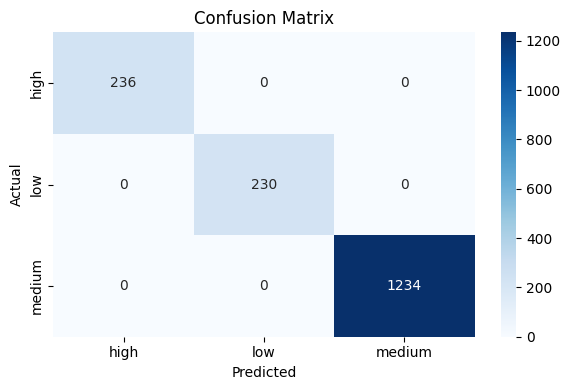

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Optional: Get class labels from the label encoder
class_names = label_encoder.classes_

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


## new test

In [10]:
import pandas as pd
import numpy as np

# Reuse the feature data
np.random.seed(42)
n_rows = 8500

df = pd.DataFrame({
    "temperature": np.random.uniform(-5, 40, size=n_rows).round(1),
    "precipitation": np.random.uniform(0, 20, size=n_rows).round(1),
    "wind_speed": np.random.uniform(0, 50, size=n_rows).round(1),
})

# Add realistic delay_hours based on features
df["delay_hours"] = (
    0.05 * df["precipitation"] +
    0.03 * df["wind_speed"] +
    0.02 * np.maximum(df["temperature"] - 35, 0)  # only penalize high heat
).round(2)

# Normalize all columns to [0, 1] before combining
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Weighted risk_score calculation (tune weights!)
df["risk_score"] = (
    0.2 * df_scaled["temperature"] +
    0.3 * df_scaled["precipitation"] +
    0.3 * df_scaled["wind_speed"] +
    0.2 * df_scaled["delay_hours"]
).round(3)

# Bin into risk levels
df["risk_level"] = pd.cut(
    df["risk_score"],
    bins=[-0.01, 0.3, 0.7, 1.0],
    labels=["low", "medium", "high"]
)

# Check distribution
print(df["risk_level"].value_counts(normalize=True))


risk_level
medium    0.725647
high      0.138941
low       0.135412
Name: proportion, dtype: float64


In [11]:
df.to_csv("weather_dataset_with_risk.csv", index=False)
